In [1]:
import pandas as pd
pd.set_option('display.max_rows', 200)

# 1. Preparation of data

In [3]:
import joblib

train = joblib.load("../assets/combined/train_feature_engineered.pkl")
test = joblib.load("../assets/combined/test_feature_engineered.pkl")
train.shape, test.shape

((2643279, 141), (694638, 141))

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2643279 entries, 0 to 2643278
Columns: 141 entries, user_id to user_preference_game_platforms_iOS
dtypes: Float64(1), Int64(14), bool(1), boolean(1), float64(76), int64(38), object(9), string(1)
memory usage: 2.8+ GB


In [5]:
# Missing value counts in train (sorted)
train_missing_count_df = train.isnull().sum().sort_values(ascending=False)
print("Missing train values: \n", train_missing_count_df)

Missing train values: 
 game_metacritic_rating                               1500068
game_RAWG_bookmark_type_playing_count                1036319
user_latitude                                         610477
user_longitude                                        610477
game_RAWG_bookmark_type_toplay_count                  564430
game_RAWG_bookmark_type_beaten_count                  458929
game_RAWG_bookmark_type_dropped_count                 366665
game_RAWG_bookmark_type_yet_count                     216842
game_released_day                                      57505
game_released_month                                    57505
game_released_year                                     57505
game_RAWG_bookmark_type_owned_count                     1225
game_current_discount                                      9
game_initial_price                                         9
game_current_price                                         9
user_preference_game_esrb_rating_Teen                      0


In [6]:
# Missing value counts in test (sorted)
test_missing_count_df = test.isnull().sum().sort_values(ascending=False)
print("Missing test values: \n", test.isnull().sum().sort_values(ascending=False))

Missing test values: 
 game_metacritic_rating                               406669
game_RAWG_bookmark_type_playing_count                291339
game_RAWG_bookmark_type_toplay_count                 164327
user_latitude                                        143537
user_longitude                                       143537
game_RAWG_bookmark_type_beaten_count                 134046
game_RAWG_bookmark_type_dropped_count                111232
game_RAWG_bookmark_type_yet_count                     68704
game_released_day                                     15037
game_released_month                                   15037
game_released_year                                    15037
game_RAWG_bookmark_type_owned_count                    1040
game_current_discount                                     2
game_initial_price                                        2
game_current_price                                        2
user_preference_game_esrb_rating_Teen                     0
user_preference_g

In [7]:
# The columns with missing counts
train_column_with_missing =  list(train_missing_count_df[test_missing_count_df > 0].index)
test_column_with_missing =  list(test_missing_count_df[test_missing_count_df > 0].index)
print(f"The columns with missing values in train: {train_column_with_missing}, \n The columns with missing values in test: {test_column_with_missing}")

The columns with missing values in train: ['game_metacritic_rating', 'game_RAWG_bookmark_type_playing_count', 'user_latitude', 'user_longitude', 'game_RAWG_bookmark_type_toplay_count', 'game_RAWG_bookmark_type_beaten_count', 'game_RAWG_bookmark_type_dropped_count', 'game_RAWG_bookmark_type_yet_count', 'game_released_day', 'game_released_month', 'game_released_year', 'game_RAWG_bookmark_type_owned_count', 'game_current_discount', 'game_initial_price', 'game_current_price'], 
 The columns with missing values in test: ['game_metacritic_rating', 'game_RAWG_bookmark_type_playing_count', 'game_RAWG_bookmark_type_toplay_count', 'user_latitude', 'user_longitude', 'game_RAWG_bookmark_type_beaten_count', 'game_RAWG_bookmark_type_dropped_count', 'game_RAWG_bookmark_type_yet_count', 'game_released_day', 'game_released_month', 'game_released_year', 'game_RAWG_bookmark_type_owned_count', 'game_current_discount', 'game_initial_price', 'game_current_price']


# 2. Inspect the missing values in train set

In [9]:
len(train_column_with_missing), len(test_column_with_missing)

(15, 15)

In [10]:
# We noticed that the columns with missing values in train and test are the same.

set(train_column_with_missing) ==  set(test_column_with_missing)

True

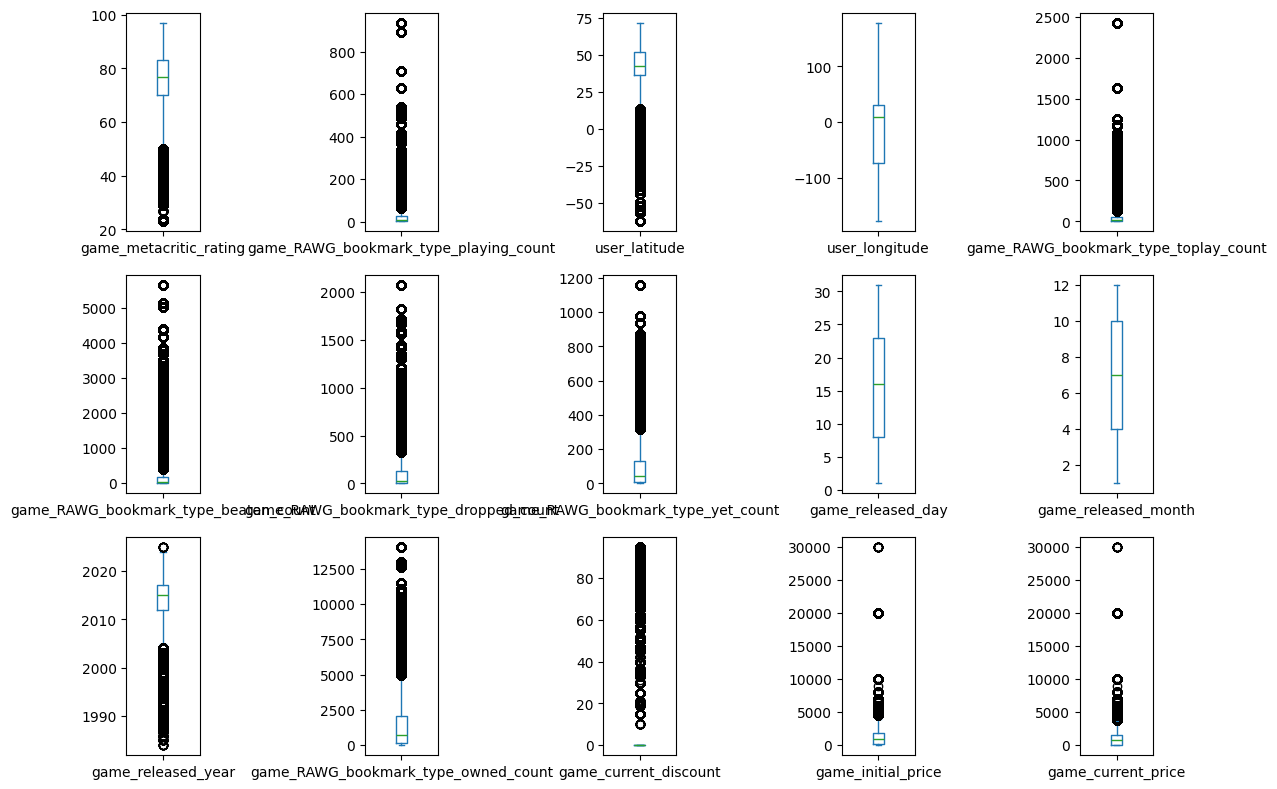

In [ ]:
import matplotlib.pyplot as plt

train[train_column_with_missing].plot(kind = "box", layout = (3,5), subplots = True, figsize = (12,8))
plt.tight_layout();

In [12]:
train[train_column_with_missing].describe()

,game_metacritic_rating,game_RAWG_bookmark_type_playing_count,user_latitude,user_longitude,game_RAWG_bookmark_type_toplay_count,game_RAWG_bookmark_type_beaten_count,game_RAWG_bookmark_type_dropped_count,game_RAWG_bookmark_type_yet_count,game_released_day,game_released_month,game_released_year,game_RAWG_bookmark_type_owned_count,game_current_discount,game_initial_price,game_current_price
count,1143211.0,1.606960e+06,2.032802e+06,2.032802e+06,2.078849e+06,2.184350e+06,2.276614e+06,2.426437e+06,2.585774e+06,2.585774e+06,2.585774e+06,2.642054e+06,2.643270e+06,2.643270e+06,2.643270e+06
mean,75.838453,3.266903e+01,3.904315e+01,-1.144491e+00,5.611446e+01,2.508666e+02,1.272875e+02,1.060570e+02,1.595819e+01,6.711528e+00,2.014076e+03,1.630316e+03,4.091003e+00,1.131190e+03,1.076037e+03
std,10.142464,7.636137e+01,2.182339e+01,7.304639e+01,1.278641e+02,6.069739e+02,2.444321e+02,1.538767e+02,8.859260e+00,3.345043e+00,5.236506e+00,2.206541e+03,1.685087e+01,1.224098e+03,1.211146e+03
min,23.0,1.000000e+00,-6.219154e+01,-1.781389e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.984000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,70.0,2.000000e+00,3.664855e+01,-7.400597e+01,3.000000e+00,4.000000e+00,5.000000e+00,9.000000e+00,8.000000e+00,4.000000e+00,2.012000e+03,1.850000e+02,0.000000e+00,1.990000e+02,9.900000e+01
50%,77.0,7.000000e+00,4.260519e+01,9.493053e+00,1.200000e+01,2.600000e+01,2.600000e+01,4.200000e+01,1.600000e+01,7.000000e+00,2.015000e+03,7.140000e+02,0.000000e+00,9.990000e+02,7.990000e+02
75%,83.0,2.700000e+01,5.191944e+01,3.031202e+01,5.300000e+01,1.700000e+02,1.340000e+02,1.330000e+02,2.300000e+01,1.000000e+01,2.017000e+03,2.096000e+03,0.000000e+00,1.799000e+03,1.499000e+03
max,97.0,9.360000e+02,7.170694e+01,1.780650e+02,2.424000e+03,5.651000e+03,2.076000e+03,1.160000e+03,3.100000e+01,1.200000e+01,2.025000e+03,1.406700e+04,9.500000e+01,2.999000e+04,2.999000e+04


In [13]:
# For those columns related to users' behaviors, we will use median to impute.
# Particularly, most of them are right skewed (which might be the game we are particularly interested in). Median can reduce the influence from these individuals.
median_impute_col = ["game_metacritic_rating","game_RAWG_bookmark_type_playing_count","game_RAWG_bookmark_type_toplay_count",
                     "game_RAWG_bookmark_type_beaten_count","game_RAWG_bookmark_type_dropped_count","game_RAWG_bookmark_type_yet_count","game_RAWG_bookmark_type_owned_count"]

In [14]:
# For those with latitude and longitude, we need to realize that the popularity of games is close to their market, which differs a lot from country to country.
# Thus, we will impute the missing values using the median of latitude/longitude under the same "user_country_code"

median_same_country_impute_col = ["user_latitude", "user_longitude"]

In [ ]:
# For those with date, we do not have clear clue on the specific release time unless manual labelling. It is not feasible for this large dataset
len(train[train["game_released_year"].isnull()]["app_id"].unique())  # 1543 games do not have released date, which can hardly be labelled manually.

# Thus, we will use mode to represent the release time.
mode_impute_col = ["game_released_year", "game_released_month", "game_released_day"]

In [16]:
# For those with price, we will consider the impact of game platforms. Thus, we will use the median price according to each platform.

platform_col = []
for col in train.columns:
    if col.startswith("game_platforms_"):
        platform_col.append(col)

median_same_platform_impute_col = ['game_initial_price', "game_current_price"]

# Discount will be calculated accordingly

# Check each platform
print(train[platform_col].sum(), test[platform_col].sum())

# We noticed that column "game_platforms_Unknown" is always 0. Thus we do not need this column anymore.
train = train.drop("game_platforms_Unknown", axis = 1)
test = test.drop("game_platforms_Unknown", axis = 1)
platform_col = []
for col in train.columns:
    if col.startswith("game_platforms_"):
        platform_col.append(col)

game_platforms_3DO                      584
game_platforms_Android               250229
game_platforms_Apple Macintosh      1060109
game_platforms_Atari                   2431
game_platforms_Commodore / Amiga       6437
game_platforms_Linux                 726842
game_platforms_Neo Geo                 1321
game_platforms_Nintendo              507317
game_platforms_PC                   2642356
game_platforms_PlayStation           892668
game_platforms_SEGA                   15193
game_platforms_Unknown                    0
game_platforms_Web                    13832
game_platforms_Xbox                  839992
game_platforms_iOS                   360783
dtype: int64 game_platforms_3DO                     141
game_platforms_Android               64574
game_platforms_Apple Macintosh      277930
game_platforms_Atari                   643
game_platforms_Commodore / Amiga      1672
game_platforms_Linux                190709
game_platforms_Neo Geo                 292
game_platforms_Nintendo   

# Impute the missing value

Note that all the test data will be imputed using the median/mode of the train set to prevent data leakage.

In [18]:
from sklearn.impute import SimpleImputer

In [19]:
def impute_missing_vals(train, test, median_impute_col, median_same_country_impute_col, mode_impute_col, median_same_platform_impute_col,platform_col):
    '''This function will do imputing separately, including final calculation on the discount.'''

    train_2 = train.copy()
    test_2 = test.copy()
    
    # User action: directly filled with median of the train
    median_imputer = SimpleImputer(strategy = "median")
    train_2[median_impute_col] = median_imputer.fit_transform(train_2[median_impute_col])
    for col, med in zip(median_impute_col, median_imputer.statistics_):
        test_2[col]= test_2[col].fillna(med)

    # Longitude/latitude: filled by county
    for col in median_same_country_impute_col:
        fill_val = train_2.groupby("user_country_code")[col].median()
        
        # However, for some users, user_country_code is "Missing". 
        # We calculate the global median in case for a particular user_country_code, no data is available for median fill.
        global_median = train_2[col].median() 
        train_2[col] = train_2[col].fillna(train_2["user_country_code"].map(fill_val)) # fill by country first
        train_2[col] = train_2[col].fillna(global_median) # Then fill the rest using global median
        test_2[col] = test_2[col].fillna(test_2["user_country_code"].map(fill_val))
        test_2[col] = test_2[col].fillna(global_median)

    # Date/time: filled by mode 
    mode_imputer = SimpleImputer(strategy = "most_frequent")
    train_2[mode_impute_col] = mode_imputer.fit_transform(train_2[mode_impute_col])
    for col, mode in zip(mode_impute_col, mode_imputer.statistics_):
        test_2[col]= test_2[col].fillna(mode)

    # Price: by platform
    for platform in platform_col:
        train_2_sub = train_2[train_2[platform]>0]  # fillna by each platform individually
        test_2_sub = test_2[test_2[platform]>0]
        median_same_platform_imputer = SimpleImputer(strategy = "median")
        train_2.loc[train_2_sub.index, median_same_platform_impute_col] = median_same_platform_imputer.fit_transform(train_2_sub[median_same_platform_impute_col])
        for col, med in zip(median_same_platform_impute_col, median_same_platform_imputer.statistics_):
            test_2.loc[test_2_sub.index, col]= test_2.loc[test_2_sub.index, col].fillna(med)

    # We add 0.000001 to avoid dividing 0
    train_2["game_current_discount"] = round((train_2["game_initial_price"] - train_2["game_current_price"])/(train_2["game_initial_price"] + 0.000001)) 
    test_2["game_current_discount"] = round((test_2["game_initial_price"] - test_2["game_current_price"])/(test_2["game_initial_price"] + 0.000001)) 

    return train_2, test_2

In [20]:
train_2, test_2  = impute_missing_vals(train, test, median_impute_col, median_same_country_impute_col, 
                        mode_impute_col, median_same_platform_impute_col,platform_col)

In [56]:
train_2.isnull().values.any(), test_2.isnull().values.any()

(np.False_, np.False_)

In [ ]:
joblib.dump(train_2, "../data/train_impute.pkl")
joblib.dump(test_2, "../data/test_impute.pkl")

['../data/test_with_additional_feature_impute.pkl']